In [6]:
using Luxor
using MiniFB

In [7]:

struct Piso 
    d::Float64
end

struct Aguja
    l::Float64
    y::Float64
    th::Float64
end

function aventar_aguja(l::Float64, piso::Piso)
    y = rand()*piso.d
    th = rand()*π 
    return Aguja(l, y, th)
end

function contar(aguja::Aguja, piso::Piso)
    if aguja.y >= piso.d - aguja.l*sin(aguja.th)
        return true
    else
        return false
    end
end

function sacar_probabilidad(piso::Piso, l::Float64, casos_totales::Int)
    
    casos_favorables = 0
    for i ∈ 1:casos_totales
        aguja = aventar_aguja(l, piso) 
        
        if contar(aguja, piso) == true
            casos_favorables += 1
        end
    end
    
    return probabilidad = casos_favorables/casos_totales
end

function pi(aguja::Aguja)
    return (2*aguja.l)\(sacar_probabilidad*piso.d)
end


#A correrlo

p = Piso(1.0)
mi_aguja = aventar_aguja(1.0, p)
contar(mi_aguja, p)
mi_probabilidad = sacar_probabilidad(p, 1.0, 9999999)
println("π ≈ " , (2*mi_aguja.l)/(mi_probabilidad*p.d)) 

π ≈ 3.141804413858626


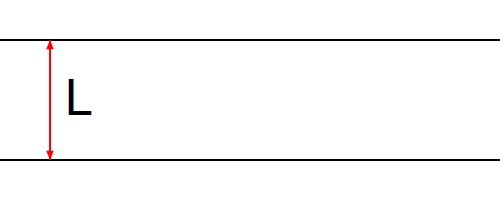

In [8]:
#=
El piso
=#

@draw begin 
    sethue("Black")
    rule(Point(0,-60), 0)
    rule(Point(0, 60), 0)
    fontsize(50)
    text("L", Point(-185, 15))
    setcolor("Red")
    arrow(Point(-200,-60), Point(-200, 60), linewidth = 2)
    arrow(Point(-200, 60), Point(-200, -60), linewidth = 2)
end 500 200


π ≈ 3.2459016393442623

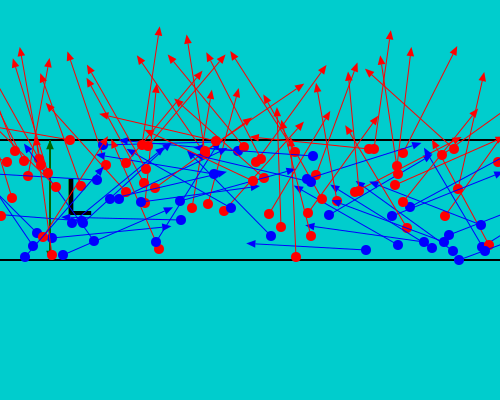

In [9]:
#=
El piso con agujas aleatorias. 
Dibujo.
=#

using Luxor

include(dirname(pathof(Luxor)) * "/play.jl")


@png begin 
    background("cyan3")
    sethue("Black")
    rule(Point(0,-60), 0)
    rule(Point(0, 60), 0)
    fontsize(50)
    text("L", Point(-185, 15))
    setcolor("DarkGreen")
    arrow(Point(-200,-60), Point(-200, 60), linewidth = 2)
    arrow(Point(-200, 60), Point(-200, -60), linewidth = 2)

   
    rojas = 0    
        for i ∈ 1:99
        
        randpoint = Point(rand(-250:250), rand(-60:60))
        randangle = rand(0:eps():π) 
        
        #Cada punto va a tener un angulo asociado, pues estoy pensando que es una aguja
        
            if abs(-60 + randpoint.y)  >= 120 || abs(-60 + randpoint.y) >= 120(1-sin(randangle))
                sethue("Red")
            rojas += 1
            else
                sethue("Blue")
            end
       
        
        (arrow(randpoint, Point(randpoint.x -120*cos(randangle), randpoint.y -120*sin(randangle))))
        (circle(randpoint, 5, :fill))
        
    end
    
    fontsize(100)
    print("π ≈ ", 2*99/rojas) 
    
    #=
    sethue("Yellow")
    rule(Point(0,-180), 0)
    =#
    
    end  500 400 


In [10]:
#savefig("C:\\Buffon.png")